# Population Density of Mexican Municipalities

This Notebook downloads Geopandas GeoDataFrames for Municipalities (admin2) derived from the 2020 Mexican Census: [INEGI](https://www.inegi.org.mx/temas/mg/).

For details how these dataframe were created, see the [mexican-boundaries](https://github.com/sbl-sdsc/mexico-boundaries) GitHub project.

In [1]:
from io import BytesIO
from urllib.request import urlopen
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
pd.options.display.max_rows = None  # display all rows
pd.options.display.max_columns = None  # display all columsns

## Boundaries of Mexican Municipalities

Read boundary polygons for Mexican states from shapefile

In [3]:
admin2_url = 'https://raw.githubusercontent.com/sbl-sdsc/mexico-boundaries/main/data/mexico_admin2.parquet'

In [4]:
resp = urlopen(admin2_url)
admin2 = gpd.read_parquet(BytesIO(resp.read()))

Calculate the area of each state (convert area from m^2 to km^2

In [5]:
admin2.crs

<Projected CRS: PROJCRS["MEXICO_ITRF_2008_LCC",BASEGEOGCRS["MEXICO ...>
Name: MEXICO_ITRF_2008_LCC
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: International Terrestrial Reference Frame 2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
admin2['area_sqkm'] = admin2['geometry'].area/ 10**6

Converting the identifying code of municipality that belongs to a certain state

In [7]:
admin2['CVEGEO']=admin2['CVEGEO'].astype('int')

In [8]:
admin2.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,area_sqkm
0,1001,01,001,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774...",1166.359248
1,1002,01,002,Asientos,"POLYGON ((2494680.261 1141224.505, 2494749.948...",543.374266
2,1003,01,003,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902...",923.357832
3,1004,01,004,Cosío,"POLYGON ((2470517.824 1155028.588, 2470552.248...",128.383545
4,1005,01,005,Jesús María,"POLYGON ((2465526.729 1114740.466, 2465752.546...",499.895092


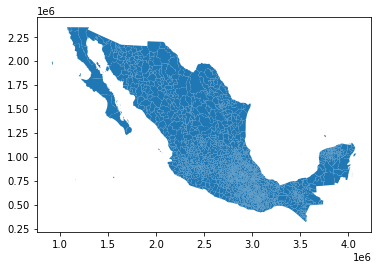

In [9]:
admin2.plot();

Get population from week 1 analyzes data file

In [10]:
population_admin2 = pd.read_csv('../data/week1analyzesMunicipalities.csv', 
                                usecols=['cve_ent', 'population'])

Add CVEGEO state-municipality code column

In [11]:
population_admin2.rename(columns = {'cve_ent':'CVEGEO'},inplace=True)

In [12]:
population_admin2.head()

,CVEGEO,population
0,31001,7035
1,11001,95581
2,19001,2918
3,28001,12768
4,5001,1130


Merge the geo dataframe with the population dataframe using the common CVE_ENT column

In [13]:
df_admin2 = admin2.merge(population_admin2, on='CVEGEO')

In [14]:
df_admin2.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,area_sqkm,population
0,1001,01,001,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774...",1166.359248,961977
1,1002,01,002,Asientos,"POLYGON ((2494680.261 1141224.505, 2494749.948...",543.374266,50864
2,1003,01,003,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902...",923.357832,60760
3,1004,01,004,Cosío,"POLYGON ((2470517.824 1155028.588, 2470552.248...",128.383545,16918
4,1005,01,005,Jesús María,"POLYGON ((2465526.729 1114740.466, 2465752.546...",499.895092,130184


The population density is computed

In [15]:
df_admin2['population/sqkm']=df_admin2['population']/df_admin2['area_sqkm']

In [16]:
df_admin2.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,area_sqkm,population,population/sqkm
0,1001,01,001,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774...",1166.359248,961977,824.769043
1,1002,01,002,Asientos,"POLYGON ((2494680.261 1141224.505, 2494749.948...",543.374266,50864,93.607672
2,1003,01,003,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902...",923.357832,60760,65.803308
3,1004,01,004,Cosío,"POLYGON ((2470517.824 1155028.588, 2470552.248...",128.383545,16918,131.777013
4,1005,01,005,Jesús María,"POLYGON ((2465526.729 1114740.466, 2465752.546...",499.895092,130184,260.422641


The data of interest is selected for future storage

In [17]:
dfFinal = df_admin2[['CVEGEO','population/sqkm']].copy()

Add cve_ent as CVEGEO state-municipality code column to make the compatibility of future merging simpler

In [18]:
dfFinal.rename(columns = {'CVEGEO':'cve_ent'},inplace=True)

The dataframe is stored

In [19]:
dfFinal.to_csv('../data/week3_population_density_municipalities.csv')